<a href="https://colab.research.google.com/github/codsalah/Machine-Learning-Projects/blob/main/playing_fantasy_with_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fantasy-football:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3677153%2F6380645%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240410%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240410T234948Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3De1df78bbdff483c0f5465b84a6872f8990885b02723c90f319960bd63648de6f34a65fded453e32a293d8d65f96a7b35197b736bc33eb45829b7ec8b21751054851d14acbd8c80333dce86eca3be9cc421c9d314c9d21bba78c9887637abbf8e4b39653bb06a43e6d35a21dfbaa5c6f88033bff680cf2cb332cf0c0a6d0c092a60a79e09946a4230c49d61e45a97f56022d38a26212c34567c9462237f4280ca724d5f8c9b4c649522fdd4a80e43d742a8921b2e9b7997ed9e595b713fecfdebaae997a863dbcfc65ab24ef6a8ac314cc90a8b645ca094d65e5b97ca05bdddbf6d72294fce3e990f81e66e38637f01c34e2b52a867efe7db44723521e130337c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3810838 bytes downloaded
Downloaded and uncompressed: fantasy-football
Data source import complete.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('viridis')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="whitegrid")

In [3]:
df = pd.read_csv('/kaggle/input/fantasy-football/cleaned_merged_seasons.csv')
df.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [4]:
df.tail()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1.0,0.0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1.0,0.0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2.0,0.0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2.0,0.0,0,-17,22,39,45,False,0,38
96168,2022-23,Philip Billing,MID,Bournemouth,0,0,15,0,0.0,70,...,1.0,0.0,2,-18361,736,19097,50,False,0,38


In [5]:
df.shape

(96169, 37)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [7]:
df.sample(10)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
14408,2017-18,Scott McTominay,MID,NaN,0,0,1,0,1.1,283,...,1.0,2.0,1,4940,7474,2534,42,False,0,27
29378,2020-21,Conor Townsend,DEF,West Brom,0,0,0,0,0.0,418,...,0.0,0.0,0,-250,45,295,44,True,0,17
31840,2020-21,Allan Marques Loureiro,MID,Everton,0,0,0,0,0.0,502,...,0.0,0.0,0,-597,17,614,52,True,0,21
66615,2021-22,Lewis Dobbin,FWD,Everton,0,0,0,0,0.0,607,...,1.0,0.0,0,6741,11019,4278,45,True,0,35
37911,2020-21,Sébastien Haller,FWD,West Ham,0,0,0,0,0.0,441,...,3.0,0.0,0,-69,0,69,61,True,0,29
5429,2016-17,Alex Oxlade-Chamberlain,MID,NaN,0,0,5,0,12.8,18,...,3.0,1.0,1,63,462,399,58,False,0,32
62844,2021-22,Arthur Okonkwo,GK,Arsenal,0,0,0,0,0.0,572,...,0.0,0.0,0,578,4237,3659,39,False,0,30
76145,2022-23,Ivan Neves Abreu Cavaleiro,MID,Fulham,0,0,0,0,0.0,214,...,3.0,0.0,0,-139,0,139,48,True,0,12
85957,2022-23,Nayef Aguerd,DEF,West Ham,0,0,20,0,0.6,472,...,4.0,0.0,0,2171,3747,1576,48,False,0,26
19118,2017-18,Jack Wilshere,MID,NaN,0,0,0,0,0.0,24,...,2.0,0.0,0,1338,1932,594,54,True,0,7


In [8]:
df['season_x']

0        2016-17
1        2016-17
2        2016-17
3        2016-17
4        2016-17
          ...   
96164    2022-23
96165    2022-23
96166    2022-23
96167    2022-23
96168    2022-23
Name: season_x, Length: 96169, dtype: object

In [9]:
df["kickoff_time"]  = pd.to_datetime(df["kickoff_time"])

In [10]:
df["opp_team_name"].value_counts()

opp_team_name
Crystal Palace    4818
Man City          4816
West Ham          4809
Southampton       4809
Spurs             4809
Leicester         4803
Chelsea           4800
Man Utd           4793
Liverpool         4789
Everton           4788
Arsenal           4783
Brighton          4400
Newcastle         4381
Wolves            3822
Leeds             3809
Aston Villa       3805
Burnley           3502
Brentford         2584
Fulham            2528
Bournemouth       2321
Watford           2243
West Brom         2228
Nott'm Forest     1305
Norwich           1262
Sheffield Utd     1221
Stoke             1025
Swansea           1006
Huddersfield       585
Sunderland         446
Middlesbrough      445
Hull               434
Name: count, dtype: int64

In [11]:
df.isnull().sum()

season_x                 0
name                     0
position                 0
team_x               19852
assists                  0
bonus                    0
bps                      0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

In [12]:
df["team_x"]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
96164          Spurs
96165          Spurs
96166    Aston Villa
96167       Brighton
96168    Bournemouth
Name: team_x, Length: 96169, dtype: object

In [13]:
df.dropna(subset=["team_x"], inplace=True)


In [14]:
df['team_x']

19852         Brighton
19853         West Ham
19854         Brighton
19855    Sheffield Utd
19856          Everton
             ...      
96164            Spurs
96165            Spurs
96166      Aston Villa
96167         Brighton
96168      Bournemouth
Name: team_x, Length: 76317, dtype: object

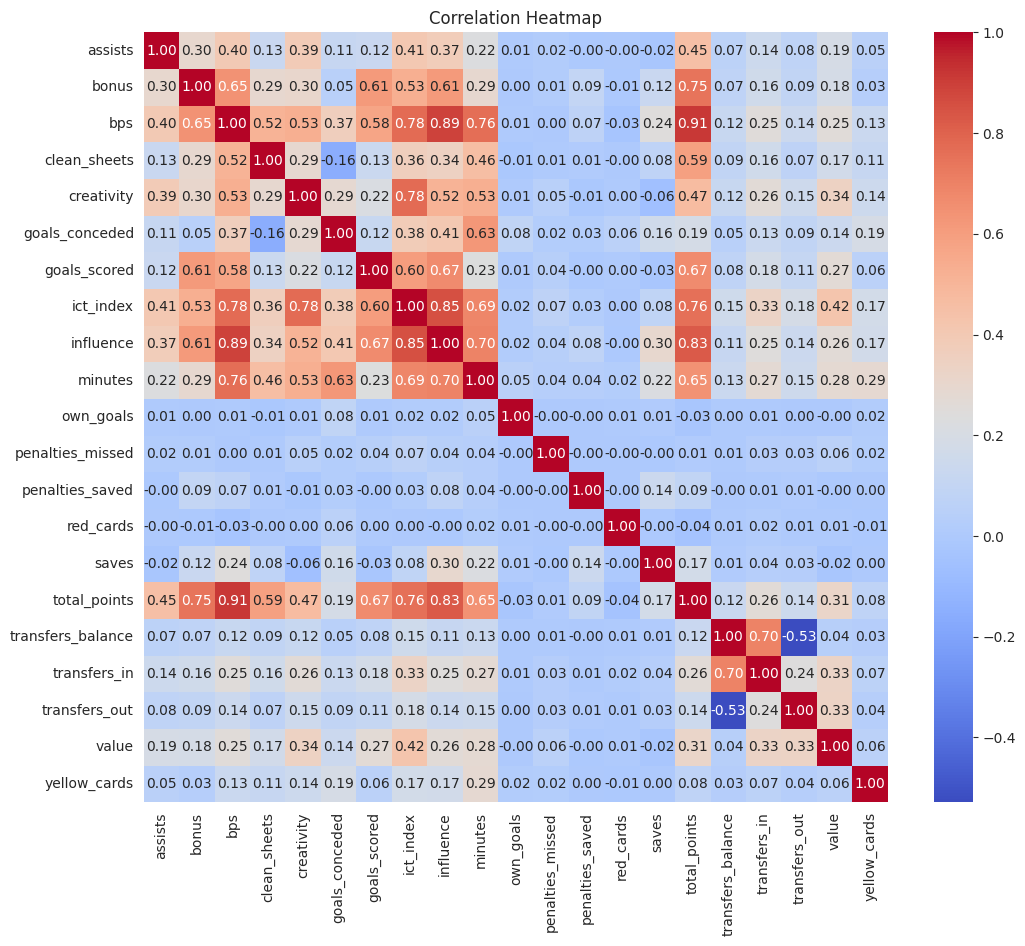

In [15]:
cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
                    'goals_conceded', 'goals_scored', 'ict_index', 'influence',
                    'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
                    'red_cards', 'saves', 'total_points', 'transfers_balance',
                    'transfers_in', 'transfers_out', 'value', 'yellow_cards']
sub_df = df[cols]

corr_matrix = sub_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

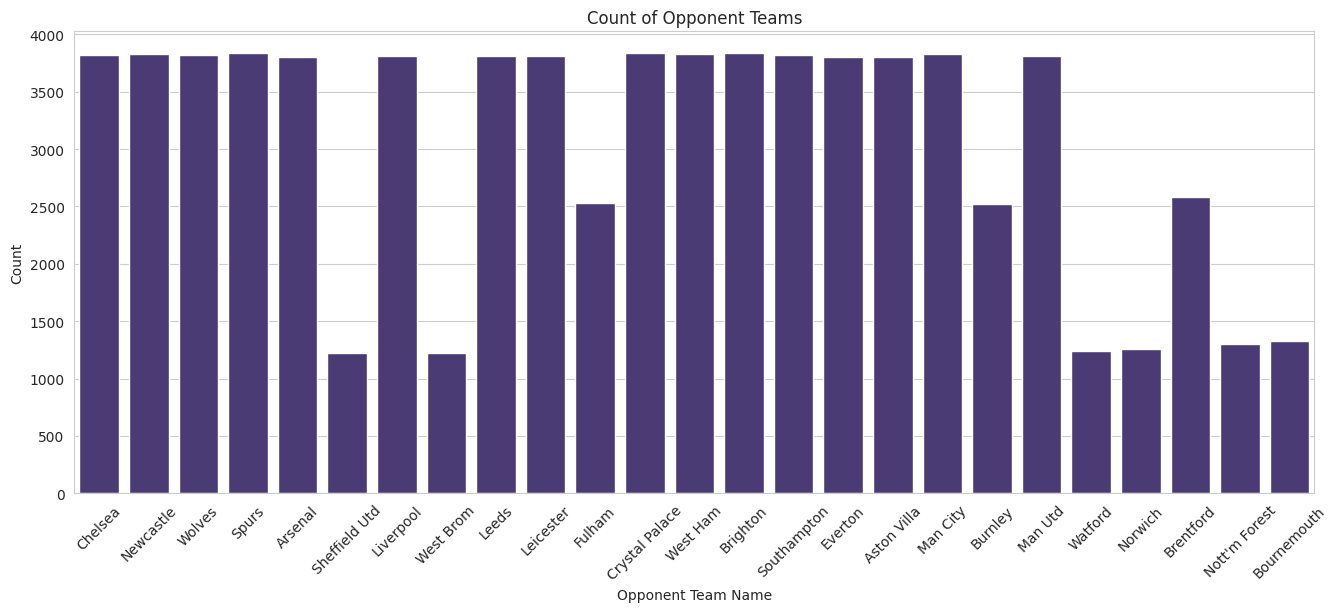

In [16]:
plt.figure(figsize=(16, 6))

sns.countplot(data=df, x='opp_team_name')
plt.xticks(rotation=45)
plt.xlabel('Opponent Team Name')
plt.ylabel('Count')
plt.title('Count of Opponent Teams')
plt.show()

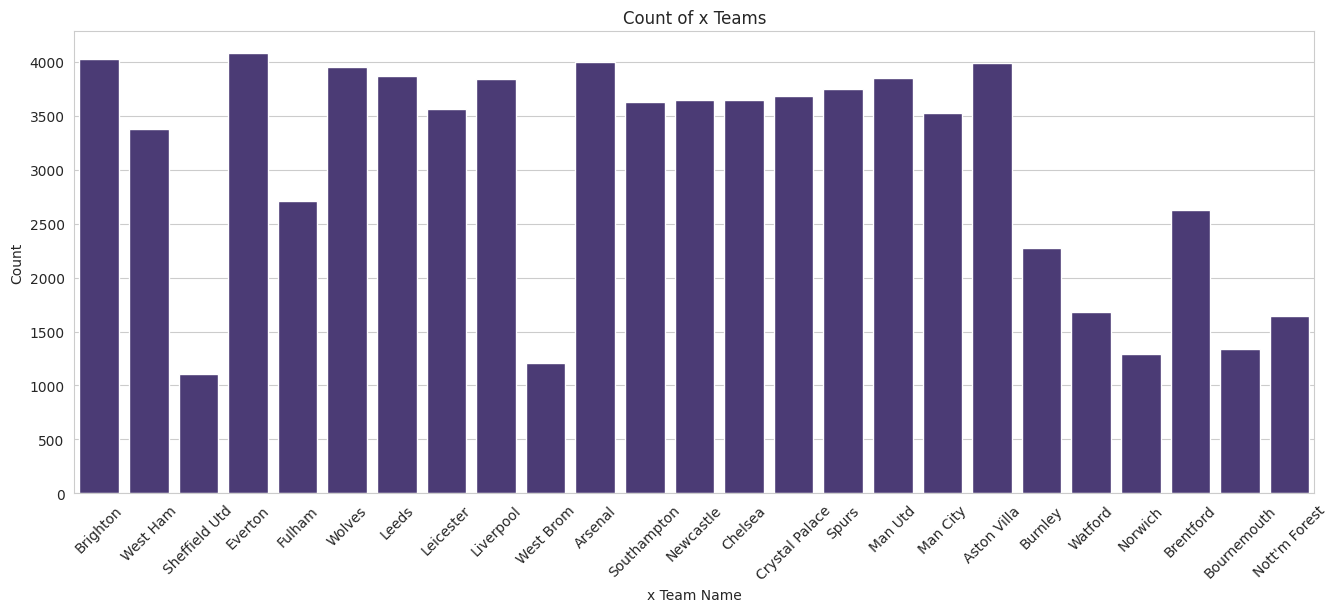

In [17]:
plt.figure(figsize=(16, 6))

sns.countplot(data=df, x='team_x')
plt.xticks(rotation=45)
plt.xlabel('x Team Name')
plt.ylabel('Count')
plt.title('Count of x Teams')
plt.show()

In [18]:
team_total_points = df.groupby('team_x')['total_points'].sum().reset_index()


In [19]:
teams = team_total_points.sort_values(by='total_points', ascending=False)
top_ten = teams.head(10)

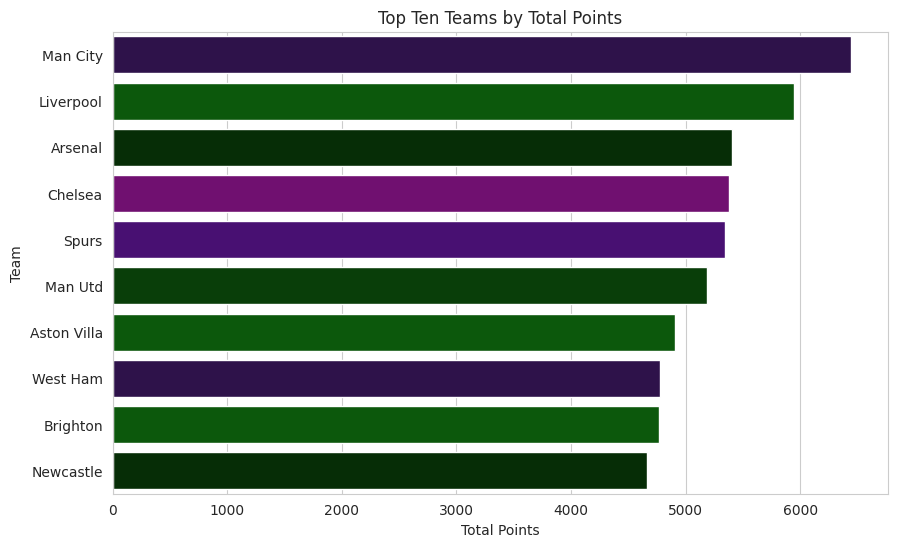

In [20]:
custom_palette = [
    "#2E0854",
    "#006400",
    "#003300",
    "#800080",
    "#4B0082",
    "#004700",
    "#006400",
]

'''    "#006400",  # Dark Green
    "#004700",  # Dark Green (Darker)
    "#003300",  # Dark Green (Darkest)'''

plt.figure(figsize=(10, 6))
sns.barplot(data=top_ten, x='total_points', y='team_x', palette=custom_palette)

plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Top Ten Teams by Total Points')
plt.show()

In [21]:
df.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [22]:
columns_to_analyze = ['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW']


for column in columns_to_analyze:
    unique_values_count = df[column].nunique()
    print(f"Number of unique values in '{column}' column: {unique_values_count}")
    print("____________________________________________________________________")

Number of unique values in 'season_x' column: 3
____________________________________________________________________
Number of unique values in 'name' column: 1327
____________________________________________________________________
Number of unique values in 'position' column: 5
____________________________________________________________________
Number of unique values in 'team_x' column: 25
____________________________________________________________________
Number of unique values in 'assists' column: 5
____________________________________________________________________
Number of unique values in 'bonus' column: 4
____________________________________________________________________
Number of unique values in 'bps' column: 103
____________________________________________________________________
Number of unique values in 'clean_sheets' column: 2
____________________________________________________________________
Number of unique values in 'creativity' column: 774
_________________

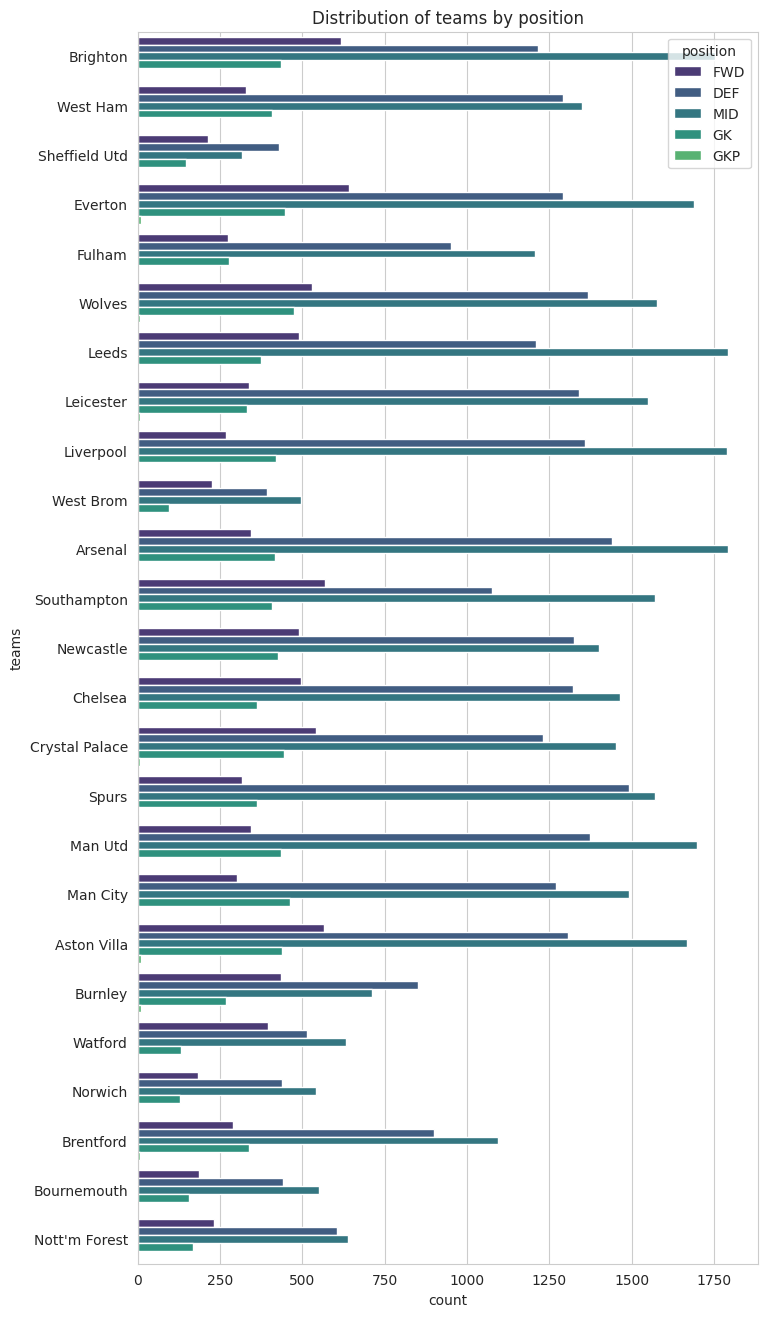

In [23]:
plt.figure(figsize=(8,16))

sns.countplot(data =df,y = "team_x", hue="position")

plt.title("Distribution of teams by position")
plt.xlabel("count")
plt.ylabel("teams")
plt.legend(title="position", loc="upper right")
plt.show()

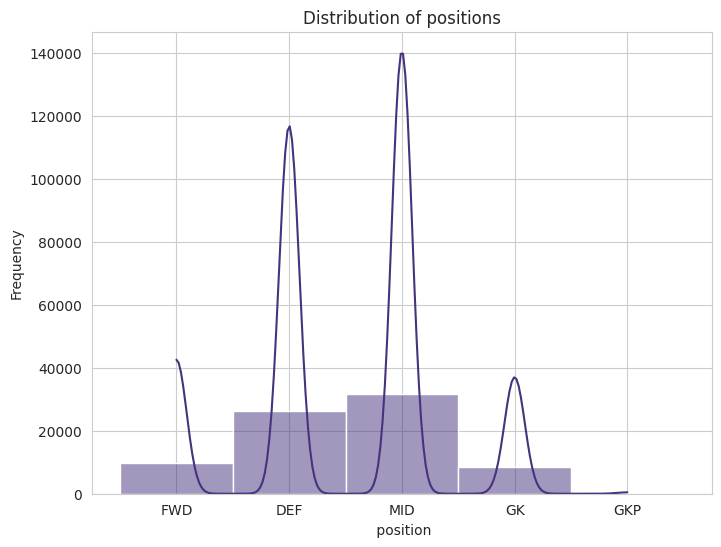

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='position', bins=5, kde=True)
plt.xlabel(' position')
plt.ylabel('Frequency')
plt.title('Distribution of positions')
plt.show()

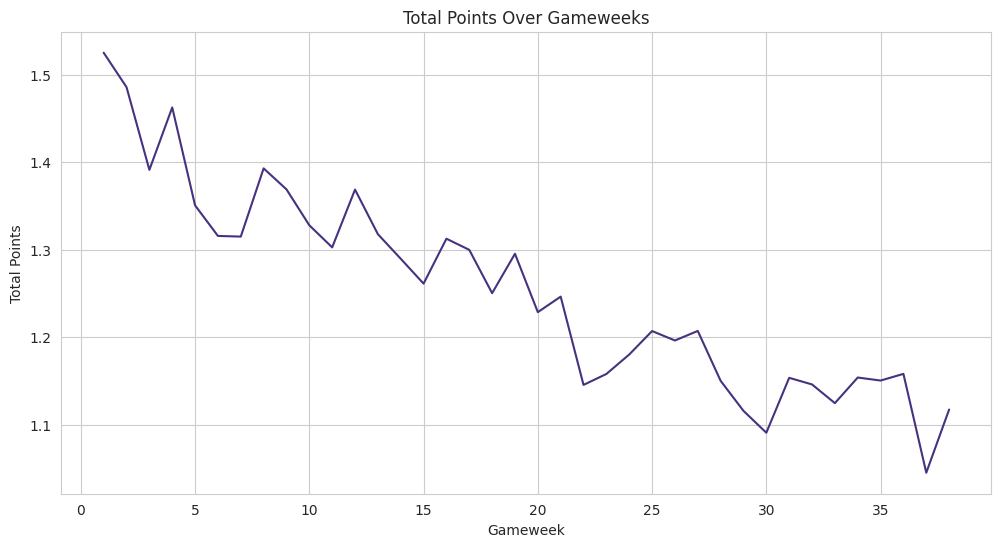

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='GW', y='total_points', ci=None)
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.title('Total Points Over Gameweeks')
plt.show()

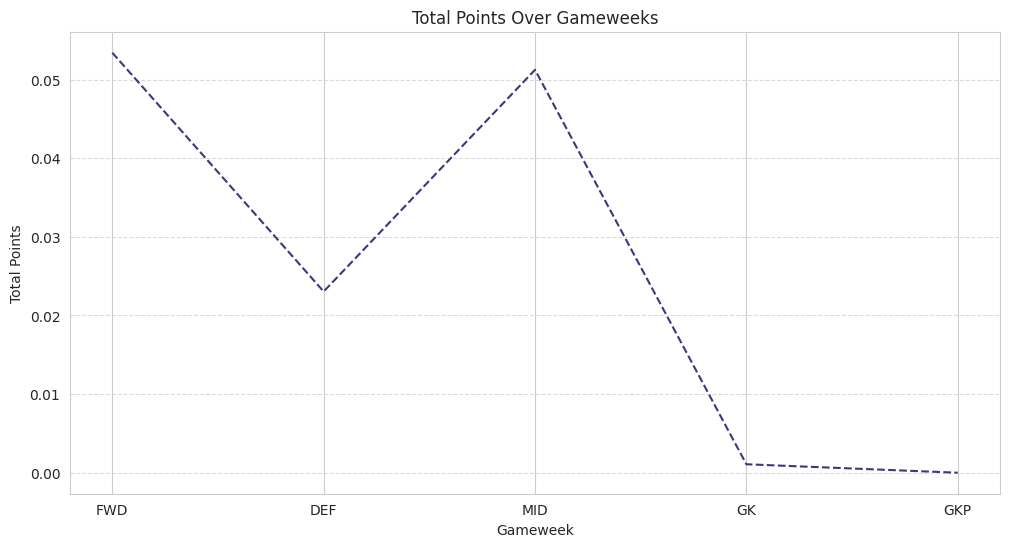

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='position', y='assists', ci=None,  linestyle='--')
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.title('Total Points Over Gameweeks')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

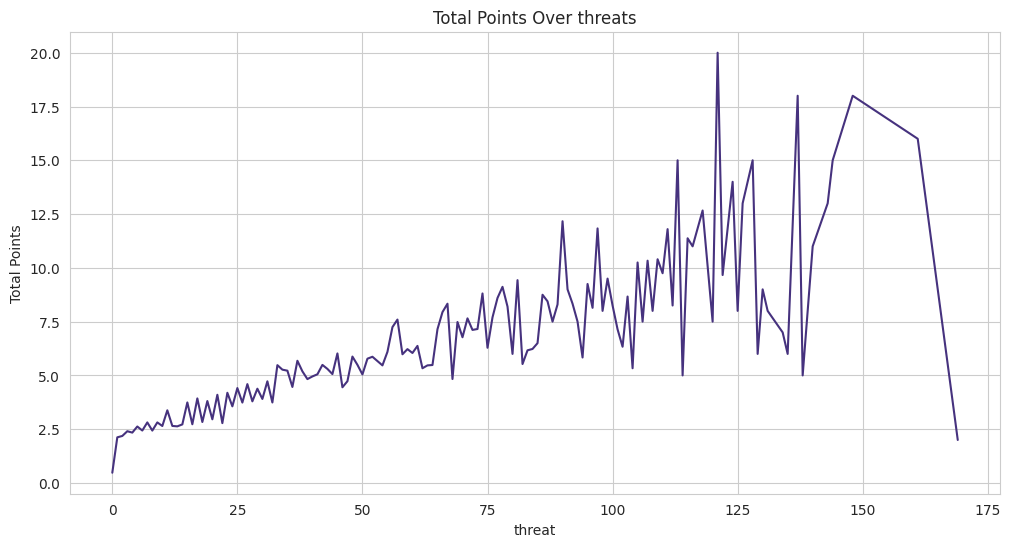

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='threat', y='total_points', ci=None)
plt.xlabel('threat')
plt.ylabel('Total Points')
plt.title('Total Points Over threats')
plt.show()

In [28]:
df.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

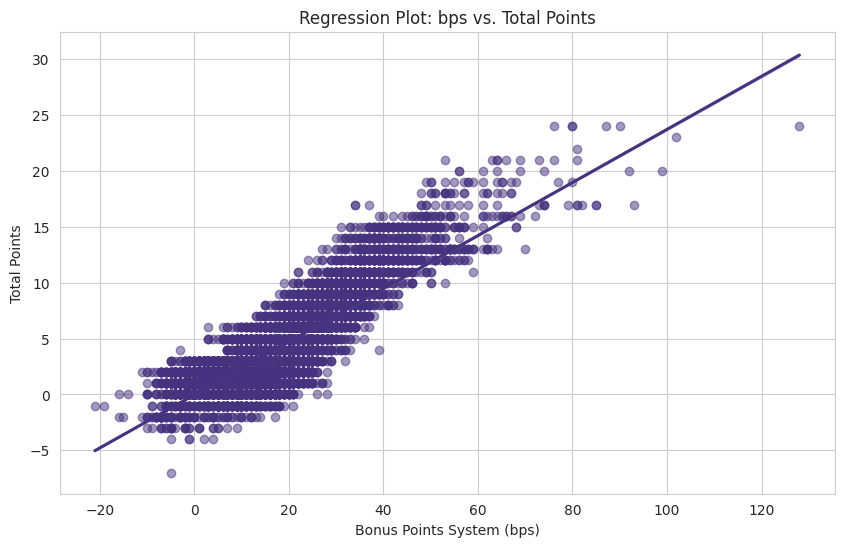

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bps', y='total_points', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Bonus Points System (bps)')
plt.ylabel('Total Points')
plt.title('Regression Plot: bps vs. Total Points')
plt.grid(True)
plt.show()

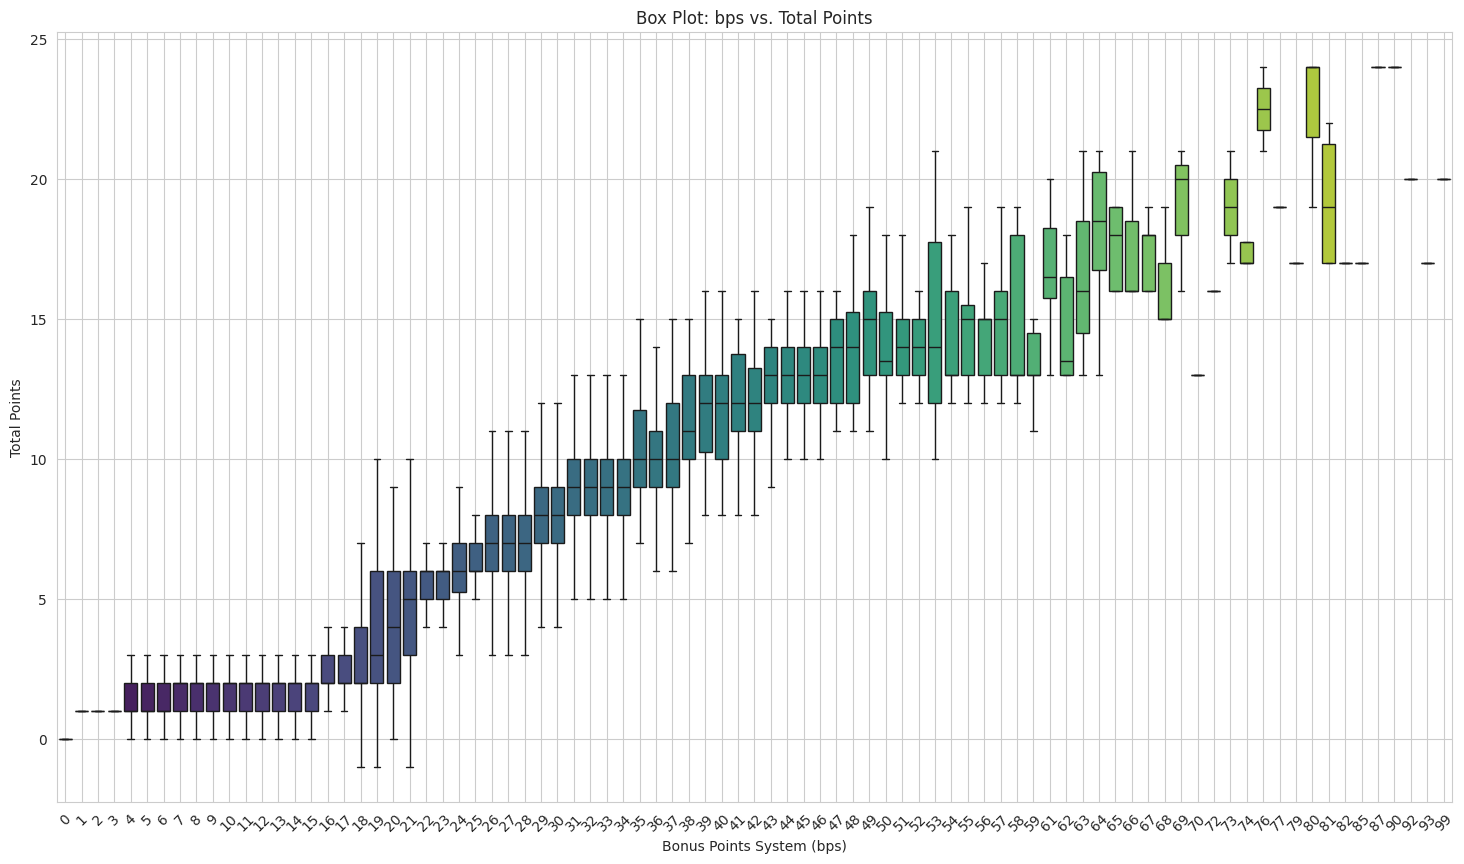

In [30]:
plt.figure(figsize=(18, 10))
df_box = df[(df['bps'] >= 0) & (df['bps'] <= 100)]
sns.boxplot(x='bps', y='total_points', data=df_box, showfliers=False,palette='viridis')
plt.xlabel('Bonus Points System (bps)')
plt.ylabel('Total Points')
plt.title('Box Plot: bps vs. Total Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

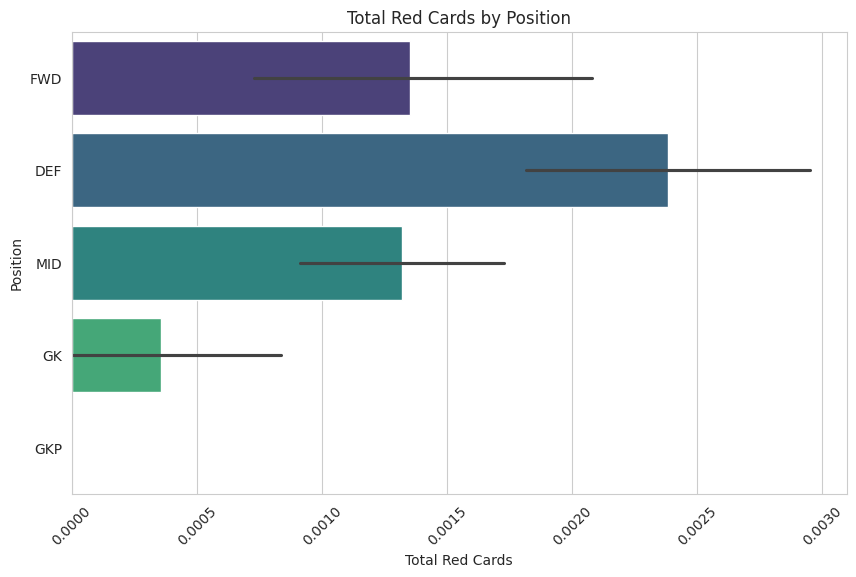

In [31]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df,x='red_cards', y='position', palette='viridis')
plt.xlabel('Total Red Cards')
plt.ylabel('Position')
plt.title('Total Red Cards by Position')
plt.xticks(rotation=45)
plt.show()